In [1]:
import sugar_analysis as sa
import cPickle as pkl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc, rcParams
import sncosmo

In [2]:
jla_bres = np.loadtxt('../../sugar_analysis_data/data/jla_data/jla_lcparams.txt' ,dtype='str')
dic_bres = {}

for i, sn_name in enumerate(np.array(jla_bres[:,0],str)):
      
        dic_bres[sn_name] = {}
        dic_bres[sn_name]['x1'] = jla_bres[i,6]
        dic_bres[sn_name]['dx1'] = jla_bres[i,7]
        dic_bres[sn_name]['c'] = jla_bres[i,8]
        dic_bres[sn_name]['dc'] = jla_bres[i,9]
        dic_bres[sn_name]['mb'] = jla_bres[i,4]
        dic_bres[sn_name]['dmb'] = jla_bres[i,5]
 
    
    

In [3]:
jla_mres = np.loadtxt('../../sncosmo_jla/res_salt2_test.txt' ,dtype='str')
dic_mres = {}

for i, sn_name in enumerate(np.array(jla_mres[:,0],str)):
      
        dic_mres[sn_name] = {}
        dic_mres[sn_name]['x1'] = jla_mres[i,6]
        dic_mres[sn_name]['dx1'] = jla_mres[i,7]
        dic_mres[sn_name]['c'] = jla_mres[i,8]
        dic_mres[sn_name]['dc'] = jla_mres[i,9]
        dic_mres[sn_name]['mb'] = jla_mres[i,4]
        dic_mres[sn_name]['dmb'] = jla_mres[i,5]


In [4]:
dic =  pkl.load(open('../../sugar_analysis_data/resfitlc_SNLS_salt2.pkl'))
dic_res  = dic['data']
fit_fail = []
dic_del = {}
for sn_name in dic_res.keys():
    if dic_res[sn_name]['res'] != 'fit fail':
        dic_del[sn_name] = dic_res[sn_name]
    else:
        fit_fail.append(sn_name)
dic_res = dic_del 


# Compare SA results with jla 

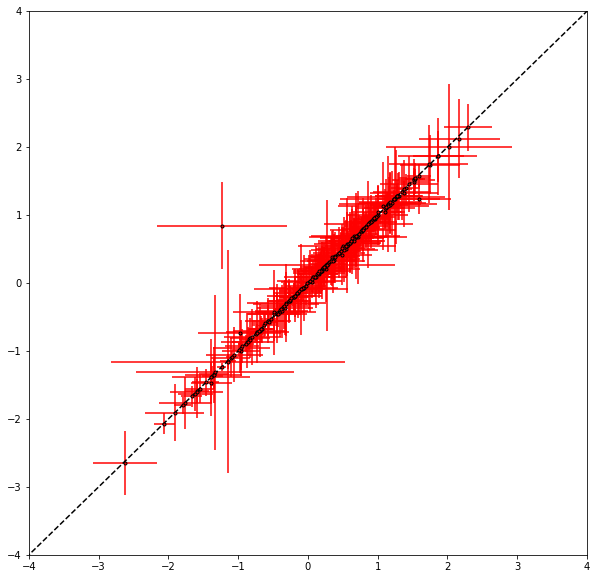

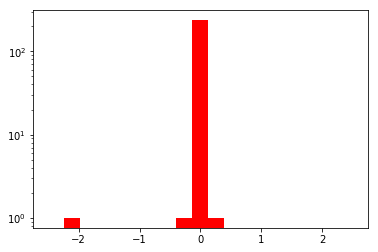

In [5]:
plt.figure(figsize=(10, 10))
diff_x1 = []
diff_dx1 = []
for sn_name in dic_res.keys():
    sn_name_jla = sn_name.split('-')[1]
    sn_name_jla = sn_name_jla.split('.')[0]
    plt.errorbar(float(dic_res[sn_name]['res']['parameters'][3]),
                 float(dic_bres[sn_name_jla]['x1']),
                 xerr=float(dic_res[sn_name]['res']['errors']['x1']),
                 yerr=float(dic_bres[sn_name_jla]['dx1']), color='r', marker='.', markeredgecolor='black')
    diff_x1.append(float(dic_res[sn_name]['res']['parameters'][3])-float(dic_bres[sn_name_jla]['x1']))
    diff_dx1.append(float(dic_res[sn_name]['res']['errors']['x1'])-float(dic_bres[sn_name_jla]['dx1']))
    
plt.plot([-5,5],[-5,5], linestyle='--', color='black')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
bins=np.linspace(-2.5,2.5,20)
plt.hist(diff_x1, bins=bins, color='r', histtype='bar',  log=True)
plt.show()

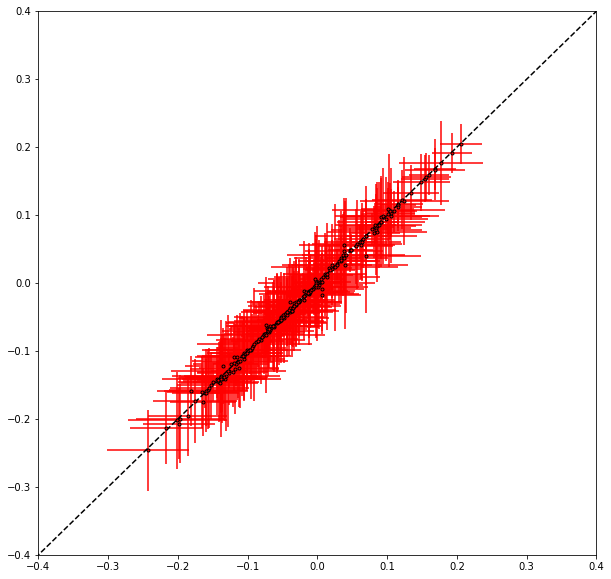

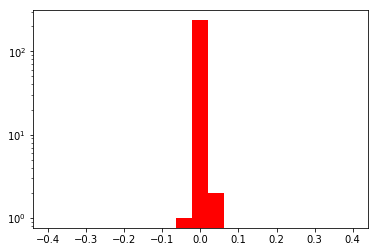

In [6]:
plt.figure(figsize=(10, 10))
diff_c = []
diff_dc = []
for sn_name in dic_res.keys():
    sn_name_jla = sn_name.split('-')[1]
    sn_name_jla = sn_name_jla.split('.')[0]
    plt.errorbar(float(dic_res[sn_name]['res']['parameters'][4]),
                 float(dic_bres[sn_name_jla]['c']),
                 xerr=float(dic_res[sn_name]['res']['errors']['c']),
                 yerr=float(dic_bres[sn_name_jla]['dc']), color='r', marker='.', markeredgecolor='black')
    diff_c.append(float(dic_res[sn_name]['res']['parameters'][4])-float(dic_bres[sn_name_jla]['c']))
    diff_dc.append(float(dic_res[sn_name]['res']['errors']['c'])-float(dic_bres[sn_name_jla]['dc']))
                    
plt.plot([-5,5],[-5,5], linestyle='--', color='black')
plt.xlim(-0.4,0.4)
plt.ylim(-0.4,0.4)
plt.show()
bins=np.linspace(-0.4,0.4,20)
plt.hist(diff_c, bins=bins, color='r', histtype='bar',  log=True)
plt.show()

# Compare SA results with Masha results 

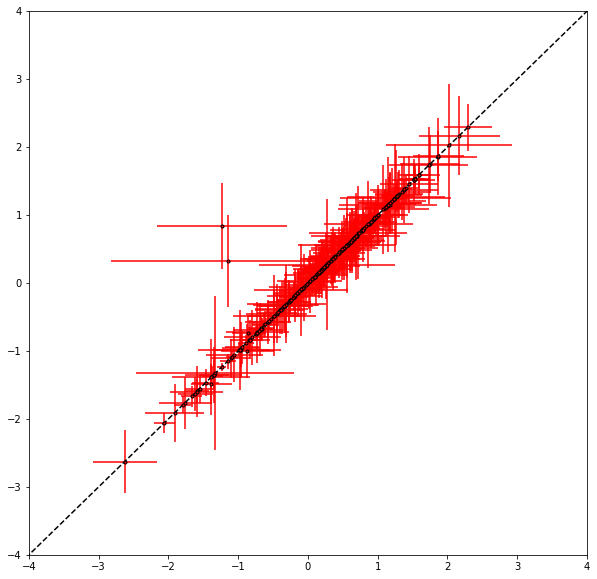

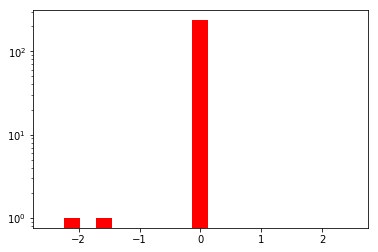

In [7]:
plt.figure(figsize=(10, 10))
diff_x1 = []
diff_dx1 = []
for sn_name in dic_res.keys():
    sn_name_jla = sn_name.split('-')[1]
    sn_name_jla = sn_name_jla.split('.')[0]
    if sn_name_jla in np.array(jla_mres[:,0],str):
        plt.errorbar(float(dic_res[sn_name]['res']['parameters'][3]),
                     float(dic_mres[sn_name_jla]['x1']),
                     xerr=float(dic_res[sn_name]['res']['errors']['x1']),
                     yerr=float(dic_mres[sn_name_jla]['dx1']), color='r', marker='.', markeredgecolor='black')
        diff_x1.append(float(dic_res[sn_name]['res']['parameters'][3])-float(dic_mres[sn_name_jla]['x1']))
        diff_dx1.append(float(dic_res[sn_name]['res']['errors']['x1'])-float(dic_mres[sn_name_jla]['dx1']))

plt.plot([-5,5],[-5,5], linestyle='--', color='black')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
bins=np.linspace(-2.5,2.5,20)
plt.hist(diff_x1, bins=bins, color='r', histtype='bar',  log=True)
plt.show()
        

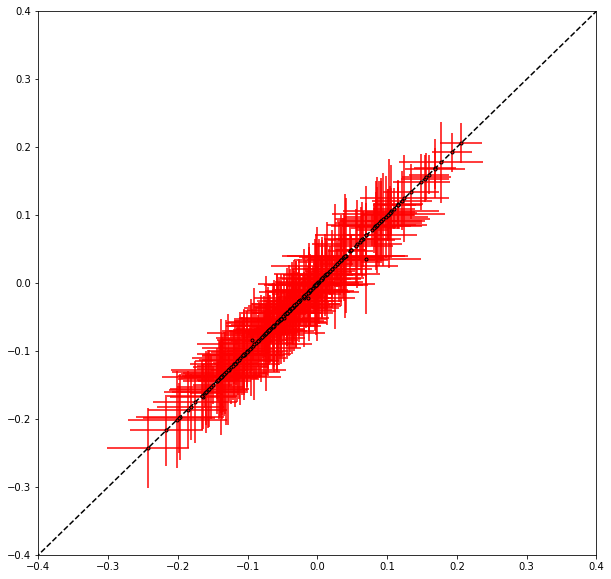

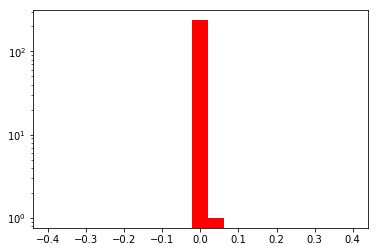

In [8]:
plt.figure(figsize=(10, 10))
diff_c = []
diff_dc = []
for sn_name in dic_res.keys():
    sn_name_jla = sn_name.split('-')[1]
    sn_name_jla = sn_name_jla.split('.')[0]
    if sn_name_jla in np.array(jla_mres[:,0],str):
        plt.errorbar(float(dic_res[sn_name]['res']['parameters'][4]),
                     float(dic_mres[sn_name_jla]['c']),
                     xerr=float(dic_res[sn_name]['res']['errors']['c']),
                     yerr=float(dic_mres[sn_name_jla]['dc']), color='r', marker='.', markeredgecolor='black')
        diff_c.append(float(dic_res[sn_name]['res']['parameters'][4])-float(dic_mres[sn_name_jla]['c']))
        diff_dc.append(float(dic_res[sn_name]['res']['errors']['c'])-float(dic_mres[sn_name_jla]['dc']))

plt.plot([-5,5],[-5,5], linestyle='--', color='black')
plt.xlim(-0.4,0.4)
plt.ylim(-0.4,0.4)
plt.show()
bins=np.linspace(-0.4,0.4,20)
plt.hist(diff_c, bins=bins, color='r', histtype='bar',  log=True)
plt.show()

04D2cf 0.125900268508
03D1dt 1.46946822279
04D4hf 2.0759576623


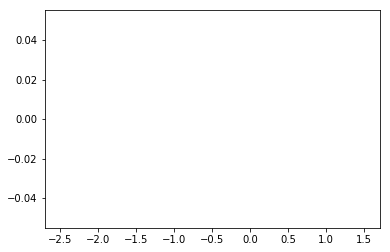

In [11]:
diffs = []
for sn_name in dic_mres.keys():
    if 'lc-'+sn_name+'.list' in dic_res.keys():
            diff = float(dic_mres[sn_name]['x1'])-float(dic_res['lc-'+sn_name+'.list']['res']['parameters'][3])
            if diff >= 0.1:
                print sn_name, diff
bins=np.linspace(-2.5,1.5,20)

plt.hist(diffs, bins=bins, color='r', histtype='bar')
plt.show()

In [10]:
print diff

[2.20138689721594e-07, -1.8481615526866335e-07, -1.2360468235605993e-05, 8.632577063460989e-05, -9.157156328765126e-07, 0.12590026850831182, 5.573364319055862e-06, -3.029911494145665e-06, 3.470614621803314e-07, -2.655584901423147e-06, 1.469468222794772, -1.6233935154597035e-05, -0.00046895211264207093, 7.2294761597202495e-06, -3.792832858895423e-07, 6.458052971503037e-06, -4.6176344014048354e-05, -0.0002384202508371458, -0.0005589877265751442, -1.169469353001773e-05, -1.1734627576587275e-06, -4.548340499371806e-06, -4.112922795063145e-06, 1.6012111628271875e-07, 2.3028189436946622e-05, 1.6589374218778374e-06, -1.9778517354296365e-05, -1.3938883782760314e-06, 9.6892333734111e-07, -3.681982332670586e-05, 5.608055332168016e-05, 1.5624824193372078e-06, 3.386074921707394e-05, -0.0004494591706258877, 3.537947551635057e-05, 7.550994468363825e-05, -2.633289808096073e-06, -0.13011437397733794, 4.479551980673957e-05, -7.327821913405419e-05, 1.4789036284490464e-07, 2.2992852154068988e-05, -4.8790